In [11]:
import os
import glob

import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import f_oneway
import scipy.stats as stats

In [12]:
datadir = '/home/konsternacja/OneDrive/STUDIA/MGR_btch/PRACA_magisterska/experiments/fluorCAM/measurement1/'

In [13]:
'''
Combining all reports into a one tsv file
'''
def flatten_sum(matrix):
    return sum(matrix, [])

# Step 1: Specify the directory where your .txt files are located
directory_path = '/home/konsternacja/OneDrive/STUDIA/MGR_btch/PRACA_magisterska/experiments/fluorCAM/measurement1/'

# Step 2: Use glob to get a list of all .txt files in the directory
files = glob.glob(directory_path + '*.TXT')

# Initialize an empty list to store DataFrames
dfs = []
group_list = []

for file in files:
    # Get the base name of the file without extension
    base_name = os.path.splitext(os.path.basename(file))[0]
    
    # Read the file into a DataFrame
    df = pd.read_csv(file, sep='\t', skiprows=2, index_col=0)
    
    # Append the DataFrame to the list
    dfs.append(df)
    
    # Add an entry to the group dictionary
    if 'wteminus' in base_name:
        group_list.append([0] * len(df.columns))
    elif 'wteplus' in base_name:
        group_list.append([1] * len(df.columns))
    elif '70eminus' in base_name:
        group_list.append([2] * len(df.columns))
    elif '70eplus' in base_name:
        group_list.append([3] * len(df.columns))
    else:
        group_list.append([None] * len(df.columns))

# Concatenate the DataFrames along the common column (Unnamed: 0)
result_df = pd.concat(dfs, ignore_index=True, axis=1)

group_list_flat = flatten_sum(group_list)

# Convert the group_dict to a DataFrame and transpose it
group_df_flat = pd.DataFrame(group_list_flat)

# Transpose group_df_flat so it can be appended as a row
group_df_flat = group_df_flat.transpose()

concatenated_df = pd.concat([result_df, group_df_flat], ignore_index=True)
concatenated_df

,0,1,2,3,4,5,6,7,8,9,...,174,175,176,177,178,179,180,181,182,183
0,1498.00,640.00,664.00,213.00,265.00,1232.00,726.00,946.00,431.00,664.00,...,700.00,1753.00,845.00,1250.00,1079.00,1094.00,1296.00,1013.00,742.00,328.00
1,91.65,61.32,58.08,42.74,52.19,92.34,88.70,69.35,49.17,53.22,...,63.21,84.07,75.45,83.36,69.71,67.22,76.13,52.83,70.68,39.76
2,91.65,61.32,58.08,42.74,52.19,92.34,88.70,69.35,49.17,53.22,...,63.21,84.07,75.45,83.36,69.71,67.22,76.13,52.83,70.68,39.76
3,76.13,48.81,44.87,29.73,39.52,76.99,72.13,55.76,36.79,40.62,...,47.61,67.84,58.94,67.43,54.63,50.86,59.61,40.34,56.58,27.39
4,706.80,504.31,491.79,389.82,437.20,708.50,678.21,568.03,426.97,459.06,...,518.40,660.90,619.19,652.51,558.60,548.62,586.80,449.62,552.46,364.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,0.77,0.68,0.48,0.76,0.89,0.83,0.84,0.78,0.83,0.92,...,0.79,0.97,0.77,0.77,0.82,0.85,1.00,0.74,1.10,0.82
101,1.20,1.04,0.93,1.28,1.27,1.23,1.26,1.25,1.38,1.29,...,1.21,1.38,1.20,1.23,1.23,1.32,1.46,1.20,1.54,1.20
102,1.55,1.34,1.41,1.70,1.72,1.62,1.70,1.59,1.54,1.66,...,1.60,1.78,1.53,1.59,1.55,2.08,1.95,1.56,1.91,3.11
103,1.85,1.55,1.78,2.36,2.17,1.85,2.08,1.79,1.70,2.01,...,1.97,2.08,1.84,1.81,1.73,2.52,2.33,1.78,2.36,1.97


In [14]:
''' 
Add index column back
'''
# Read the file
file = pd.read_csv(datadir + '70eminus1.TXT', sep='\t', skiprows=2)

# Extract the index column
index_column = file['Unnamed: 0']

# Insert the index_column 
df_for_analysis = concatenated_df.join(index_column)

df_for_analysis = df_for_analysis.T

# Set the last row as the header
df_for_analysis.columns = df_for_analysis.iloc[-1]

# Remove the last row
df_for_analysis = df_for_analysis.iloc[:-1]

# Rename the last column
df_for_analysis = df_for_analysis.rename(columns={df_for_analysis.columns[-1]: 'groups'})

# Save the concatenated DataFrame to a new TSV file
df_for_analysis.to_csv('/home/konsternacja/OneDrive/STUDIA/MGR_btch/PRACA_magisterska/experiments/fluorCAM/measurement1/concatenated_file.tsv', sep='\t', index=False)

In [15]:
df_for_analysis

Unnamed: 0,Size [pixels],Fo,Fo_gauss,Fo_median,Fm,Fv,Fp,Fp-median,Fp-gauss,Fp-average,...,qL_Lss,qL_D1,qL_D2,qL_D3,Rfd_L1,Rfd_L2,Rfd_L3,Rfd_L4,Rfd_Lss,groups
0,1498.0,91.65,91.65,76.13,706.8,615.15,736.96,681.57,885.58,793.76,...,-0.2,1.19,1.2,1.2,0.2,0.77,1.2,1.55,1.85,2.0
1,640.0,61.32,61.32,48.81,504.31,442.99,543.51,492.86,684.7,595.06,...,-0.24,1.18,1.24,1.24,0.26,0.68,1.04,1.34,1.55,2.0
2,664.0,58.08,58.08,44.87,491.79,433.71,508.32,463.38,628.65,553.86,...,0.16,1.2,1.22,1.23,0.21,0.48,0.93,1.41,1.78,2.0
3,213.0,42.74,42.74,29.73,389.82,347.08,394.73,351.91,521.73,442.98,...,-0.82,1.12,1.22,1.22,0.22,0.76,1.28,1.7,2.36,2.0
4,265.0,52.19,52.19,39.52,437.2,385.02,460.44,406.58,603.26,514.71,...,-0.99,1.2,1.3,1.22,0.25,0.89,1.27,1.72,2.17,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,1094.0,67.22,67.22,50.86,548.62,481.4,570.33,510.88,707.97,625.04,...,-0.46,1.24,1.24,1.22,0.22,0.85,1.32,2.08,2.52,0.0
180,1296.0,76.13,76.13,59.61,586.8,510.66,618.65,555.28,764.87,675.01,...,-0.79,1.2,1.2,1.18,0.25,1.0,1.46,1.95,2.33,0.0
181,1013.0,52.83,52.83,40.34,449.62,396.78,488.67,434.8,629.05,539.08,...,-0.79,1.24,1.29,1.33,0.25,0.74,1.2,1.56,1.78,0.0
182,742.0,70.68,70.68,56.58,552.46,481.78,590.19,533.9,733.68,644.52,...,-0.55,1.28,1.21,1.23,0.28,1.1,1.54,1.91,2.36,0.0


In [16]:
''' 
Data standarization
'''
normalized_df = df_for_analysis.apply(lambda x: (x - x.min()) / (x.max() - x.min()) if x.name != 'groups' and x.name != 'Unnamed: 0' else x)
normalized_df.head()

Unnamed: 0,Size [pixels],Fo,Fo_gauss,Fo_median,Fm,Fv,Fp,Fp-median,Fp-gauss,Fp-average,...,qL_Lss,qL_D1,qL_D2,qL_D3,Rfd_L1,Rfd_L2,Rfd_L3,Rfd_L4,Rfd_Lss,groups
0,0.674224,0.787525,0.787525,0.780628,0.785318,0.785499,0.791059,0.798362,0.79588,0.79814,...,0.999981,0.423077,0.999667,0.961832,0.069767,0.214689,0.166052,0.146341,0.317881,2.0
1,0.251355,0.376271,0.376271,0.377856,0.414912,0.422315,0.444169,0.446331,0.459149,0.45075,...,0.99998,0.384615,0.999756,0.97201,0.209302,0.163842,0.107011,0.089431,0.218543,2.0
2,0.263184,0.332339,0.332339,0.31977,0.39201,0.402738,0.381068,0.391337,0.365194,0.37872,...,0.999993,0.461538,0.999712,0.969466,0.093023,0.050847,0.066421,0.108401,0.294702,2.0
3,0.040907,0.124339,0.124339,0.096565,0.20548,0.219986,0.177381,0.183394,0.185966,0.184867,...,0.999961,0.153846,0.999712,0.966921,0.116279,0.20904,0.195572,0.186992,0.486755,2.0
4,0.066535,0.252475,0.252475,0.240896,0.292151,0.300023,0.29521,0.285379,0.322633,0.310273,...,0.999955,0.461538,0.999889,0.966921,0.186047,0.282486,0.191882,0.192412,0.423841,2.0


In [17]:
# Załóżmy, że masz DataFrame 'df' z danymi
# df = pd.read_csv('twoja_tabela.tsv', sep='\t')

# Grupowanie danych według kolumny 'groups'
grouped_data = normalized_df.groupby('groups')
grouped_data.head()

# Przeprowadzenie testu jednoczynnikowego ANOVA dla każdej kolumny
significant_columns = []
for column in normalized_df.columns[1:-1]:  # Wykluczamy ostatnią kolumnę ('groups')
    group_values = [group[column].values for name, group in grouped_data]
    stat, p_value = f_oneway(*group_values)
    
    # Analiza wyników testu
    if p_value < 0.05:  # Próg istotności, można dostosować
        print(f'Różnice statystyczne w kolumnie "{column}" (p-value: {p_value})')
        significant_columns.append(column)
    # else:
    #     print(f'Brak różnic statystycznych w kolumnie "{column}" (p-value: {p_value})')

# Możesz również przeprowadzić testy dla całej tabeli
all_data_values = [group[column].values for name, group in grouped_data for column in normalized_df.columns[:-1]]
stat, p_value = f_oneway(*all_data_values)

# Analiza wyników testu dla całej tabeli
if p_value < 0.05:  # Próg istotności, można dostosować
    print(f'Różnice statystyczne w całej tabeli (p-value: {p_value})')
else:
    print(f'Brak różnic statystycznych w całej tabeli (p-value: {p_value})')


Różnice statystyczne w kolumnie "Fm_L2" (p-value: 0.00423288065130578)
Różnice statystyczne w kolumnie "Fm_L3" (p-value: 0.00650417171240191)
Różnice statystyczne w kolumnie "Fm_L4" (p-value: 0.008125128695912564)
Różnice statystyczne w kolumnie "Fm_Lss" (p-value: 0.00728516838879779)
Różnice statystyczne w kolumnie "Ft_L2" (p-value: 0.0026128995312019957)
Różnice statystyczne w kolumnie "Ft_L3" (p-value: 0.0035435800754261733)
Różnice statystyczne w kolumnie "Ft_L4" (p-value: 0.009160332790443461)
Różnice statystyczne w kolumnie "Ft_Lss" (p-value: 0.00863332439775719)
Różnice statystyczne w kolumnie "Fv_L2" (p-value: 0.000595619756210967)
Różnice statystyczne w kolumnie "Fv_L3" (p-value: 0.0011731736119834477)
Różnice statystyczne w kolumnie "Fv_L4" (p-value: 0.0013756072481112256)
Różnice statystyczne w kolumnie "Fv_Lss" (p-value: 0.0010870372664053734)
Różnice statystyczne w kolumnie "Fq_L1" (p-value: 0.008061392369368604)
Różnice statystyczne w kolumnie "Fq_L2" (p-value: 0.01437053

In [18]:
print(significant_columns)

['Fm_L2', 'Fm_L3', 'Fm_L4', 'Fm_Lss', 'Ft_L2', 'Ft_L3', 'Ft_L4', 'Ft_Lss', 'Fv_L2', 'Fv_L3', 'Fv_L4', 'Fv_Lss', 'Fq_L1', 'Fq_L2', 'QY_max', 'Fv/Fm_L1', 'Fv/Fm_L2', 'Fv/Fm_L3', 'Fv/Fm_L4', 'Fv/Fm_Lss', 'Fv/Fm_D1', 'Fv/Fm_D2', 'QY_L1', 'QY_D1', 'QY_D2', 'QY_D3', 'NPQ_L1', 'NPQ_L2', 'NPQ_L3', 'NPQ_L4', 'NPQ_Lss', 'NPQ_D1', 'NPQ_D2', 'NPQ_D3', 'qN_L1', 'qN_L2', 'qN_L3', 'qN_L4', 'qN_Lss', 'qN_D1', 'qN_D2', 'qN_D3', 'qP_L1', 'qP_D1', 'qP_D3', 'qL_D1', 'Rfd_L1', 'Rfd_L2', 'Rfd_L3', 'Rfd_L4', 'Rfd_Lss']


In [19]:
# Wykres pudełkowy dla istotnych kolumn
for column in significant_columns:
    plt.figure(figsize=(8, 6))
    normalized_df.boxplot(column=column, by='groups', grid=False)
    plt.title(f'Boxplot dla kolumny "{column}"')
    plt.suptitle('')  # Usunięcie domyślnego tytułu nad wykresem
    plt.show()

AttributeError: module 'numpy' has no attribute 'matrix'

<Figure size 800x600 with 0 Axes>

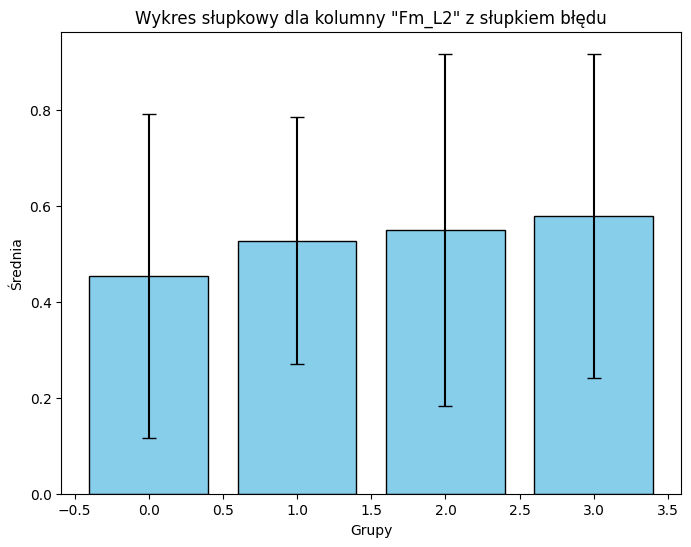

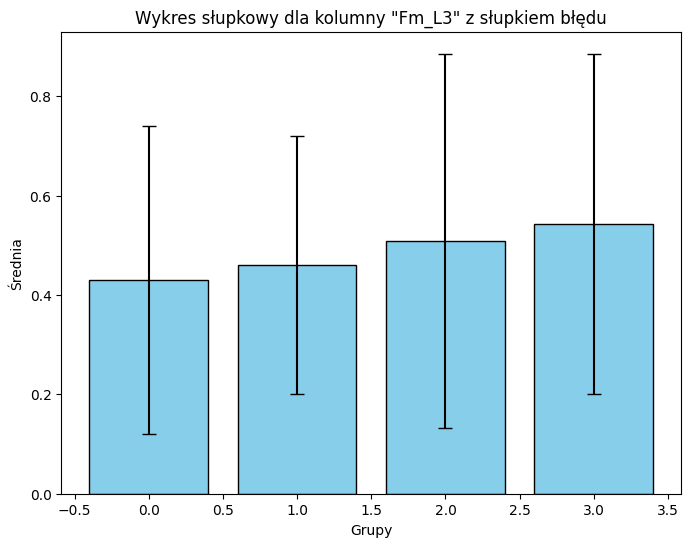

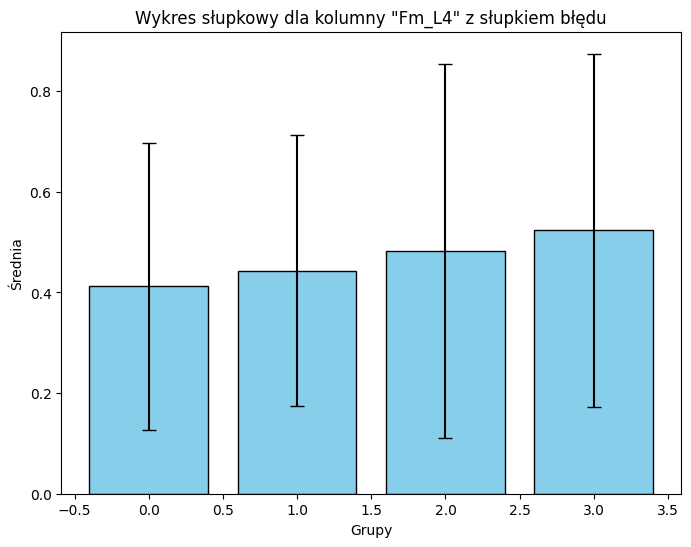

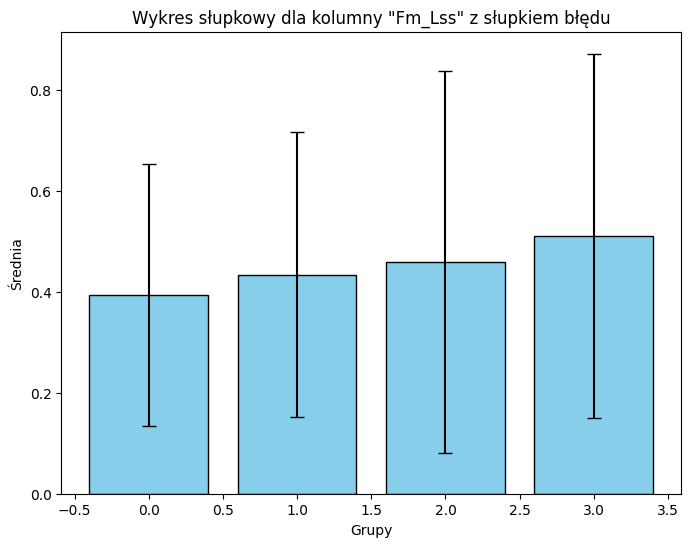

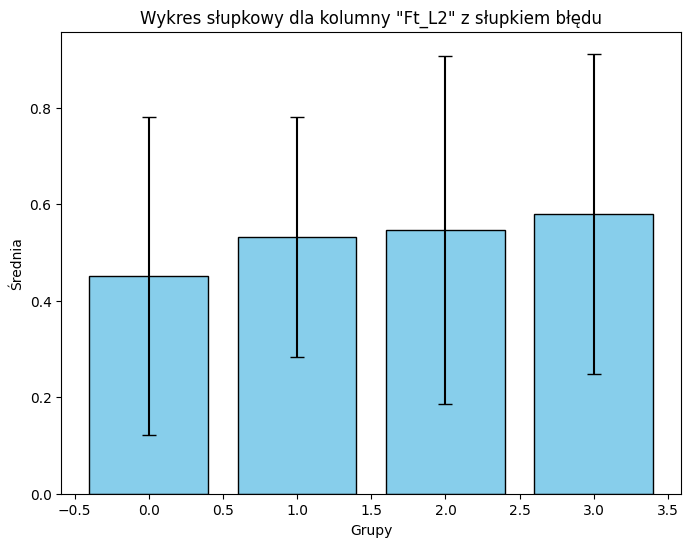

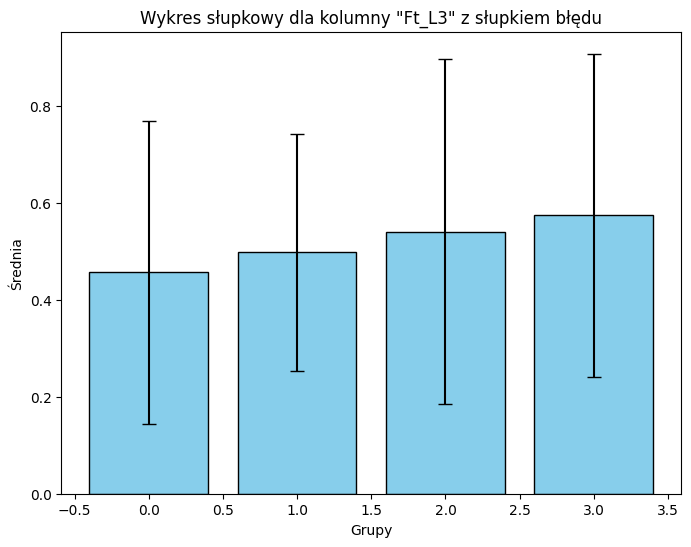

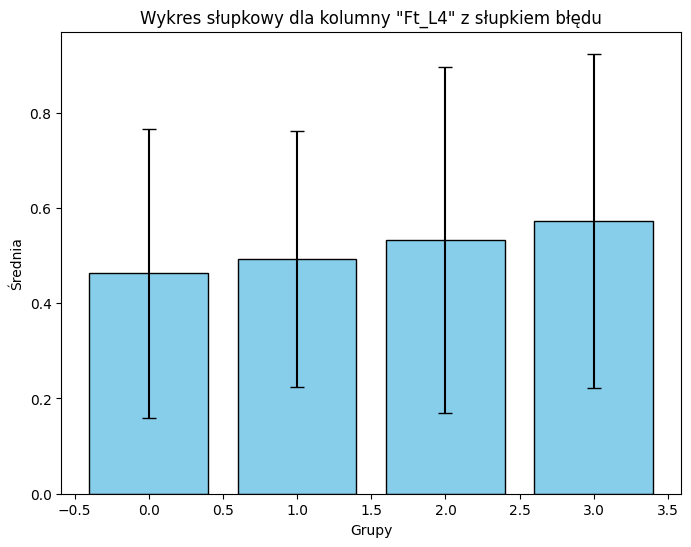

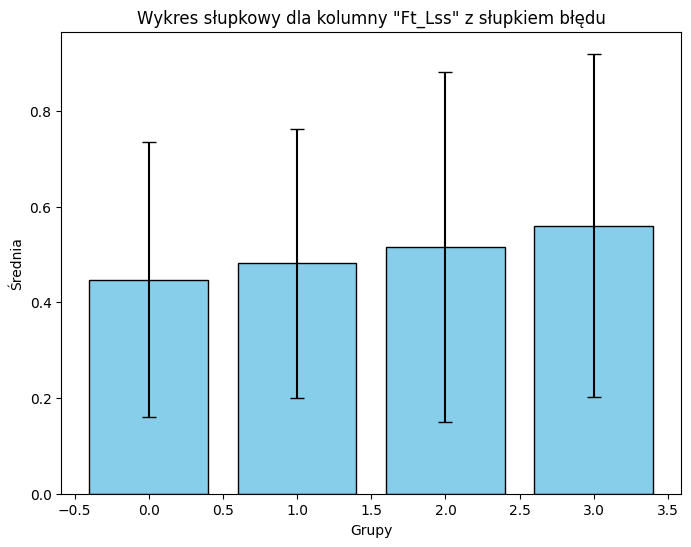

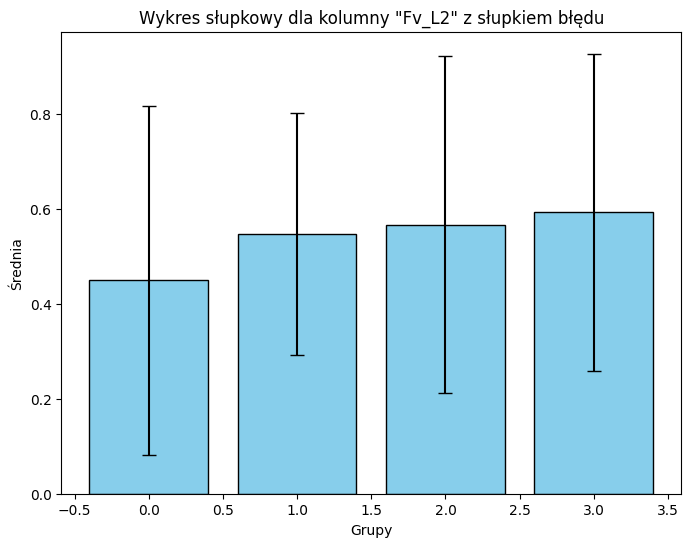

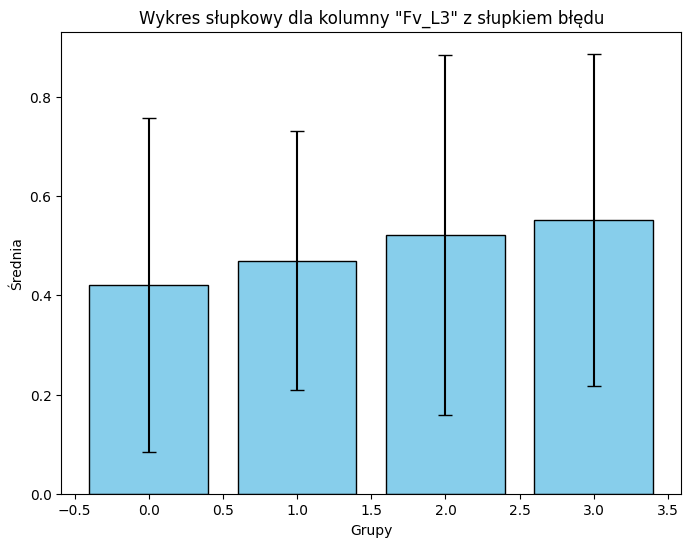

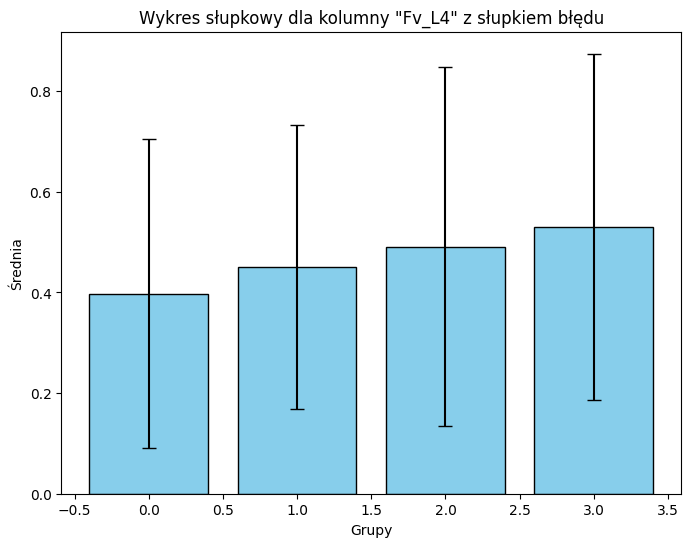

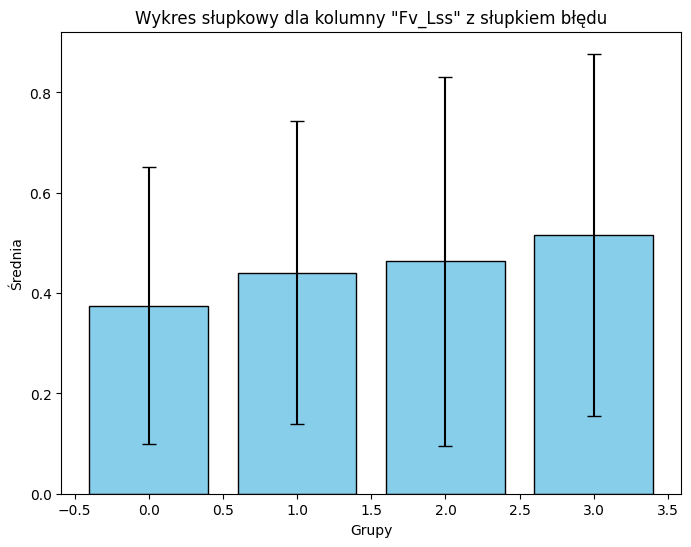

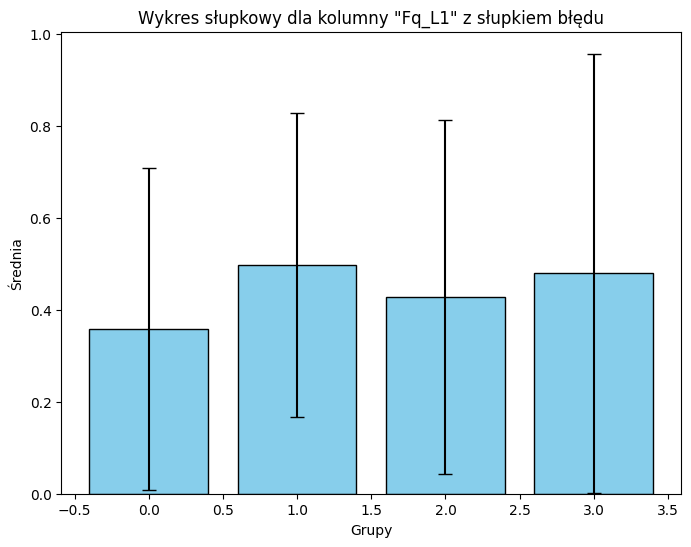

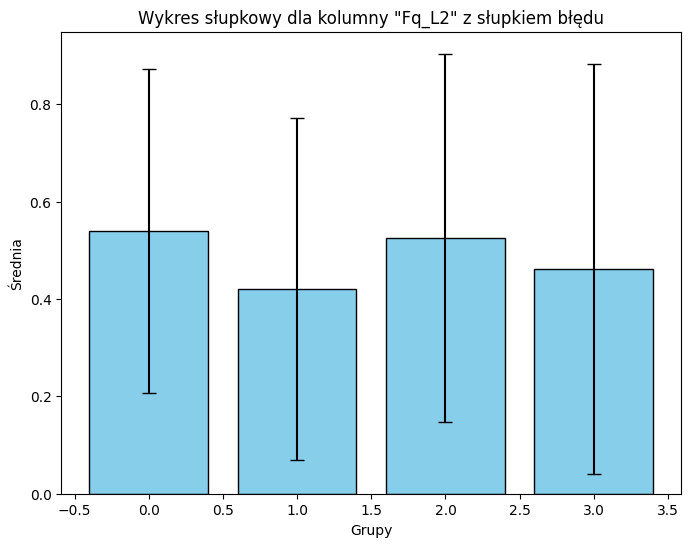

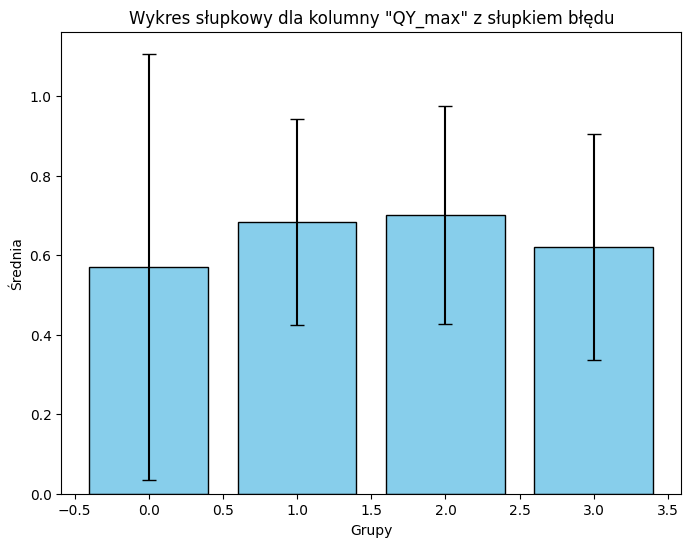

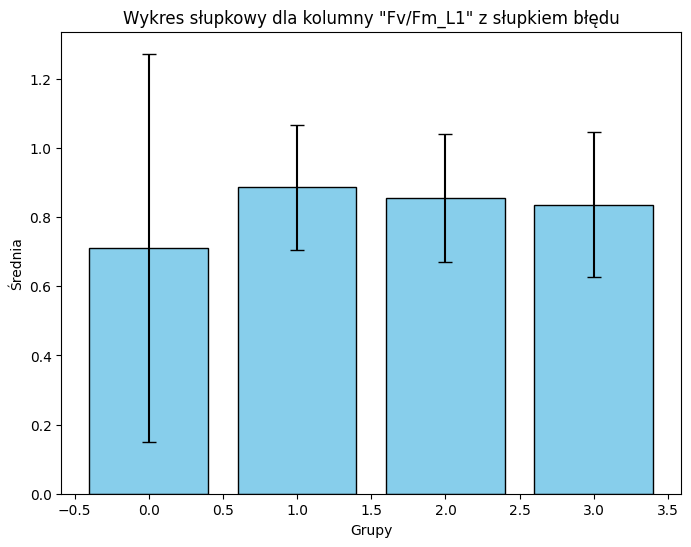

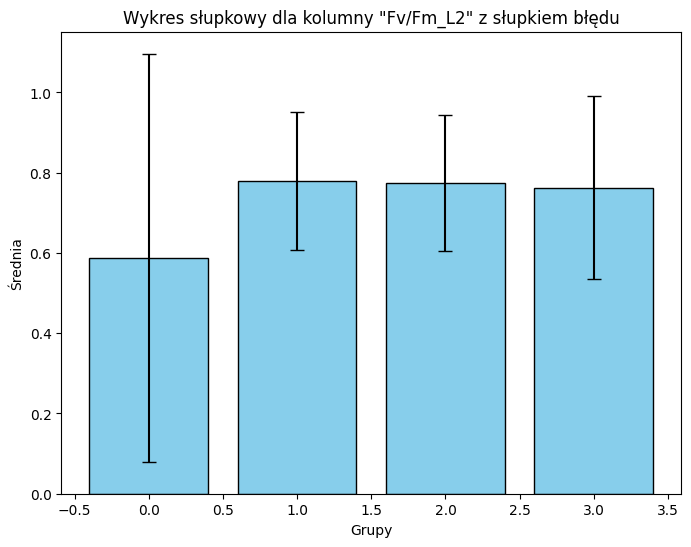

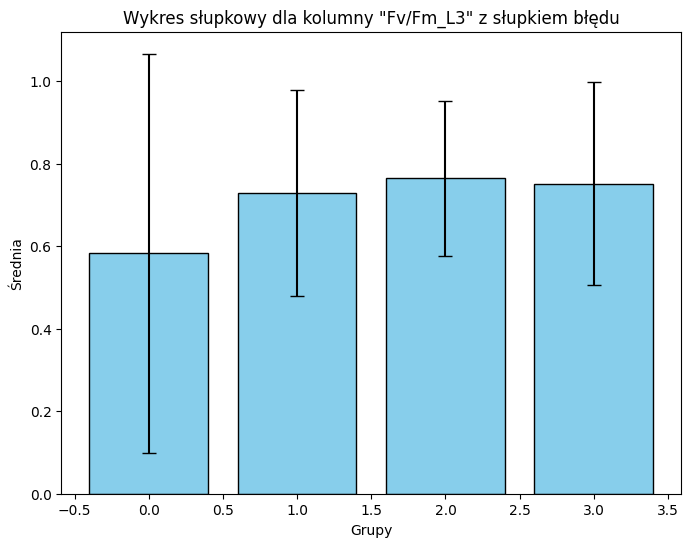

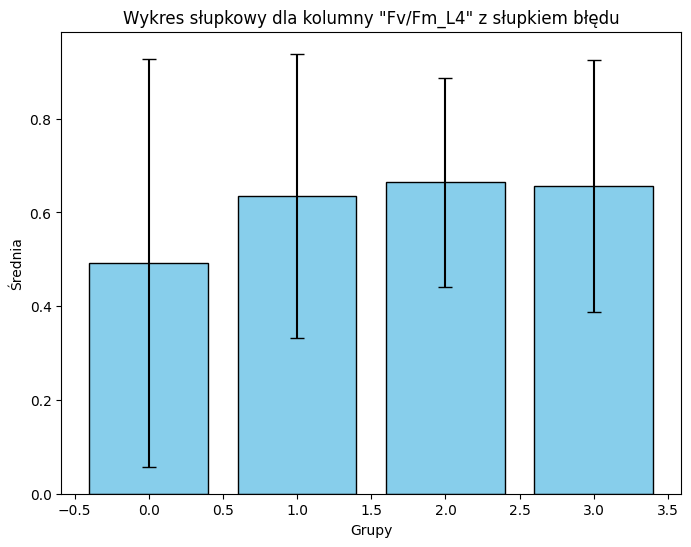

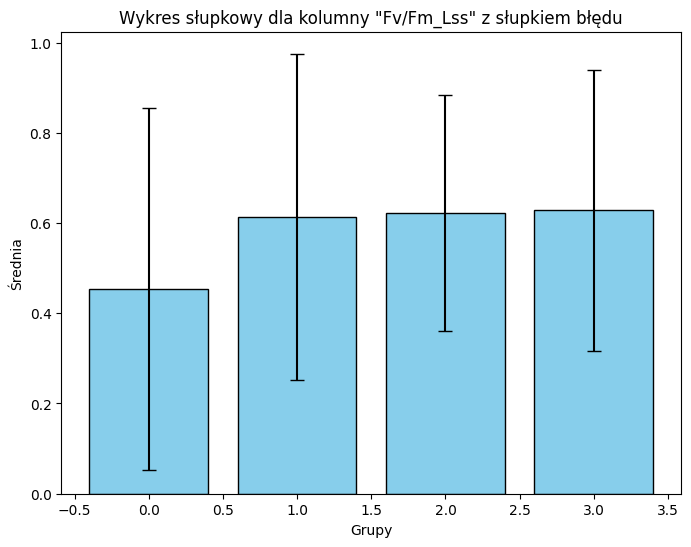

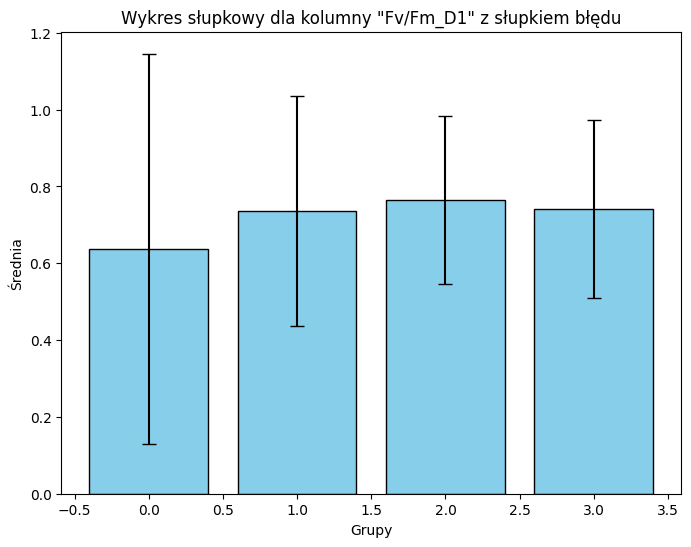

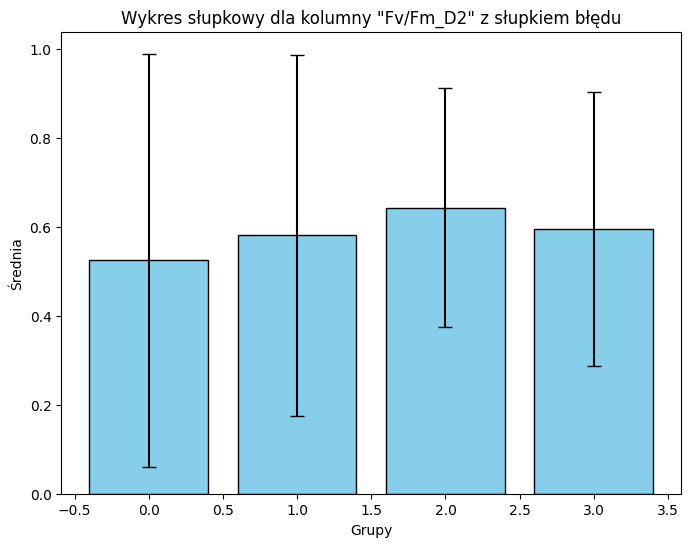

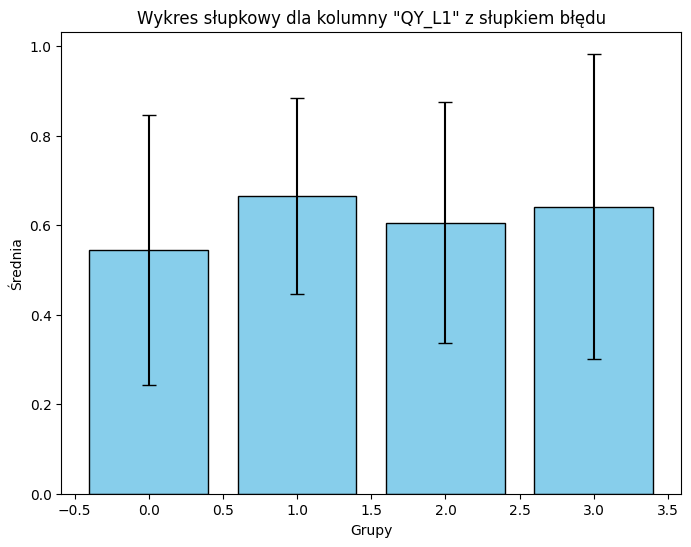

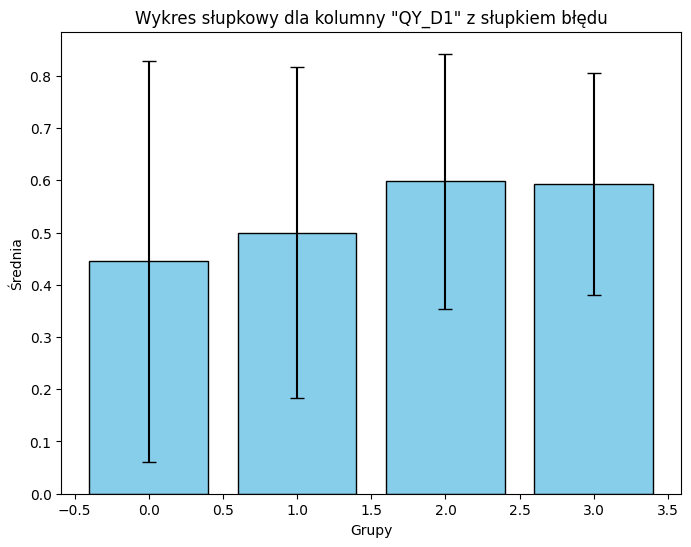

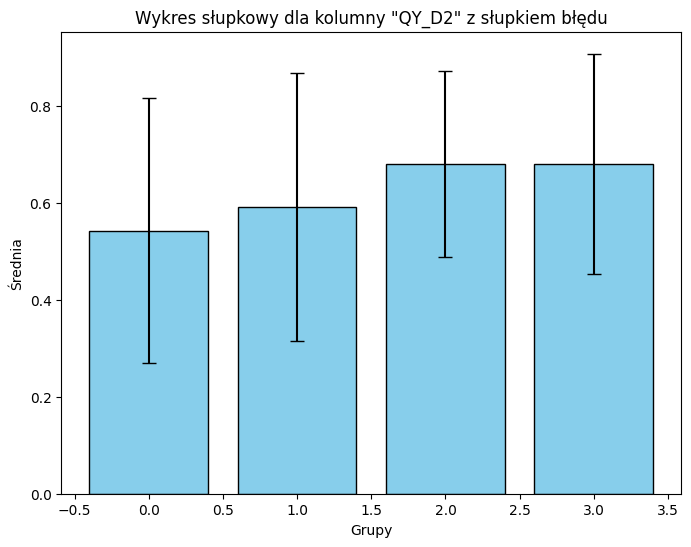

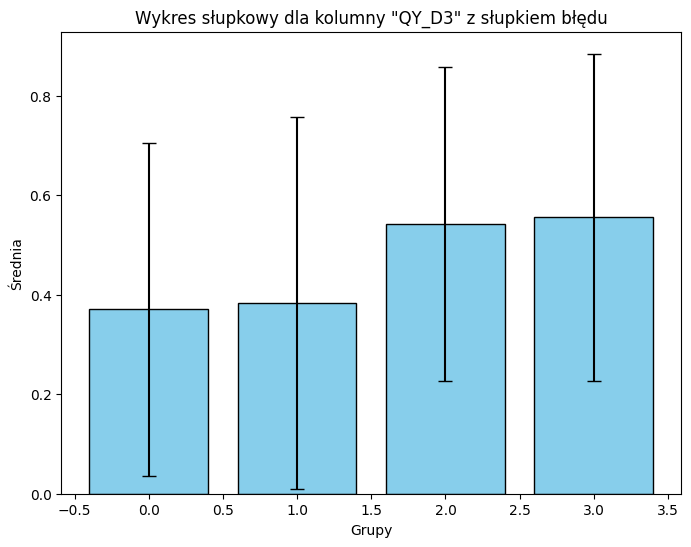

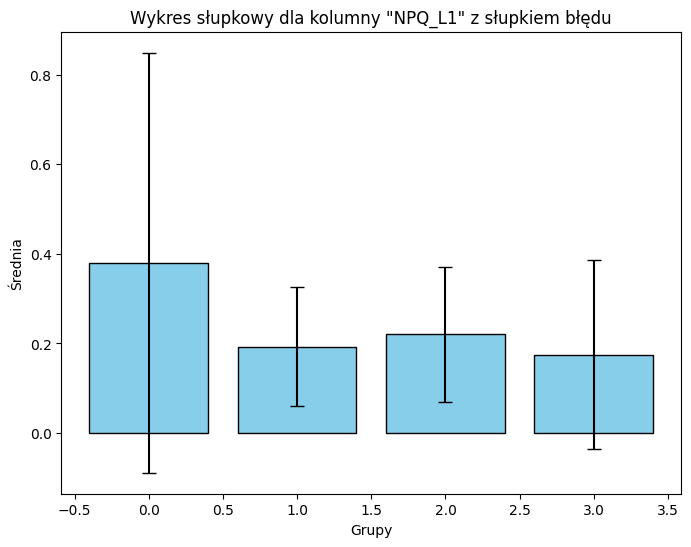

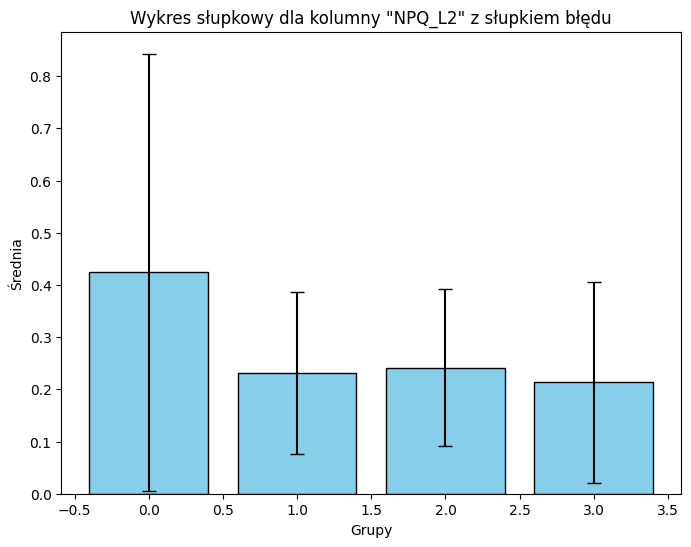

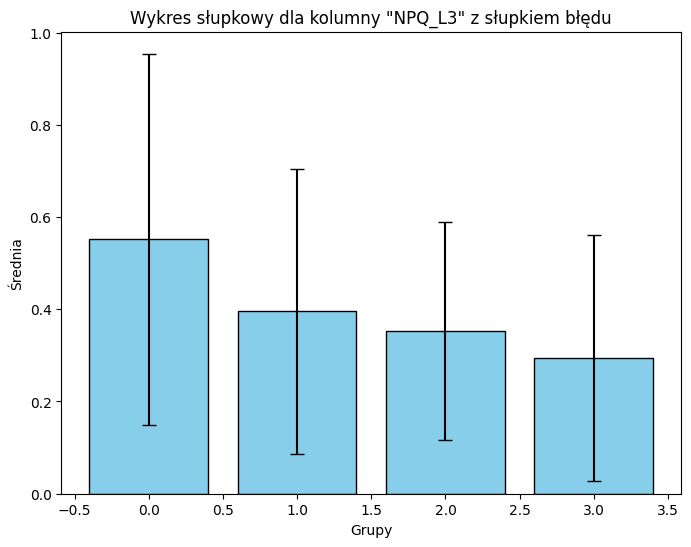

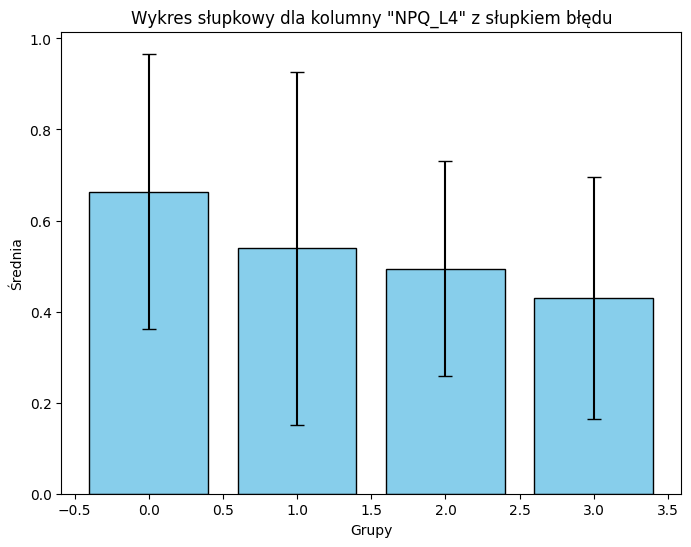

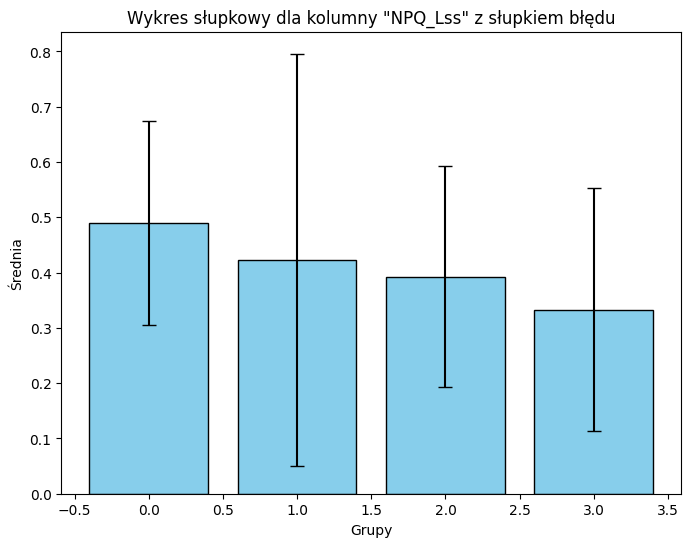

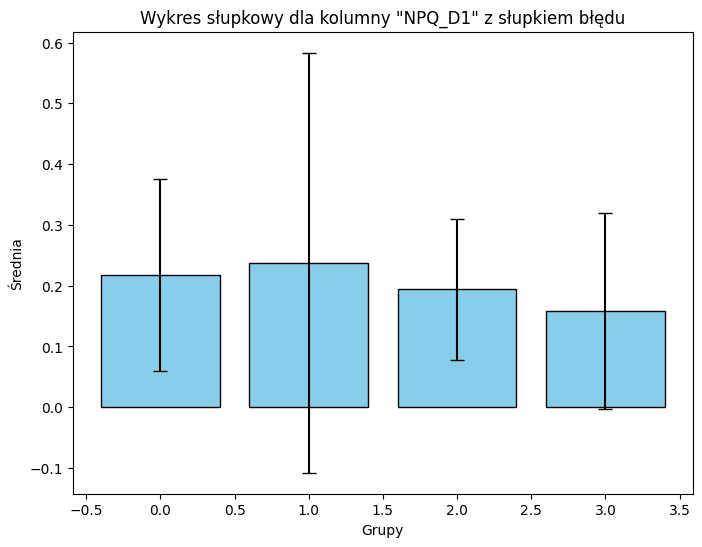

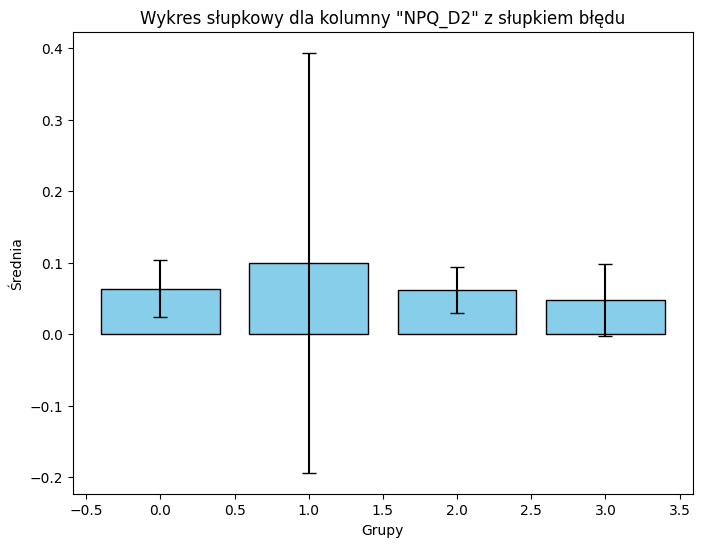

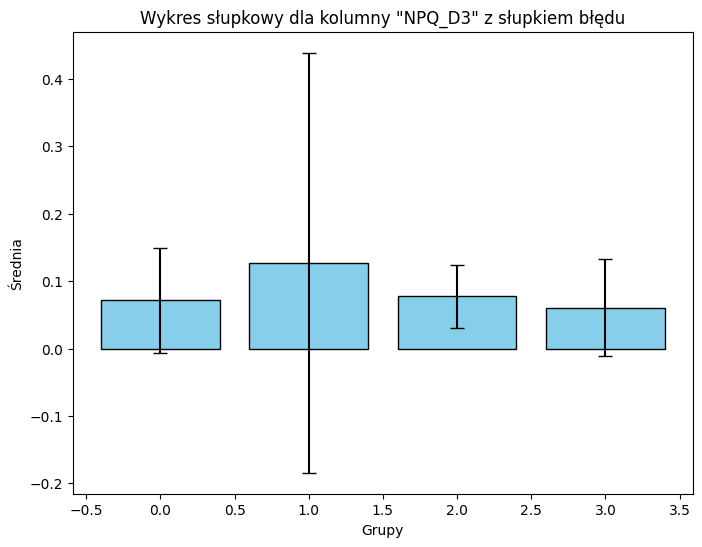

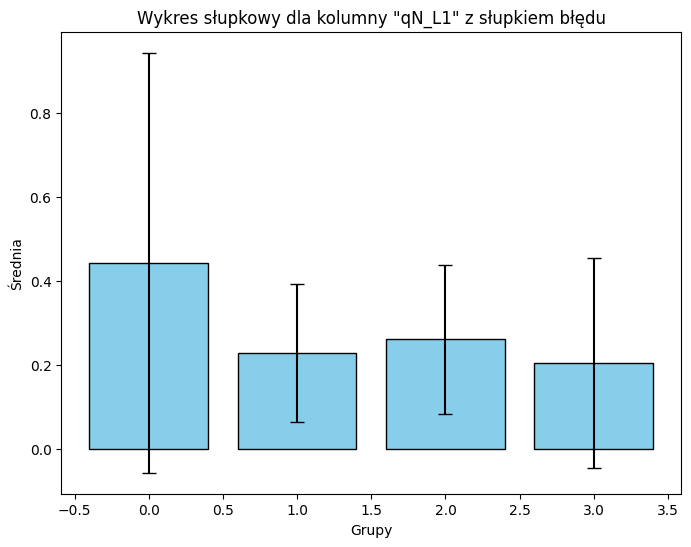

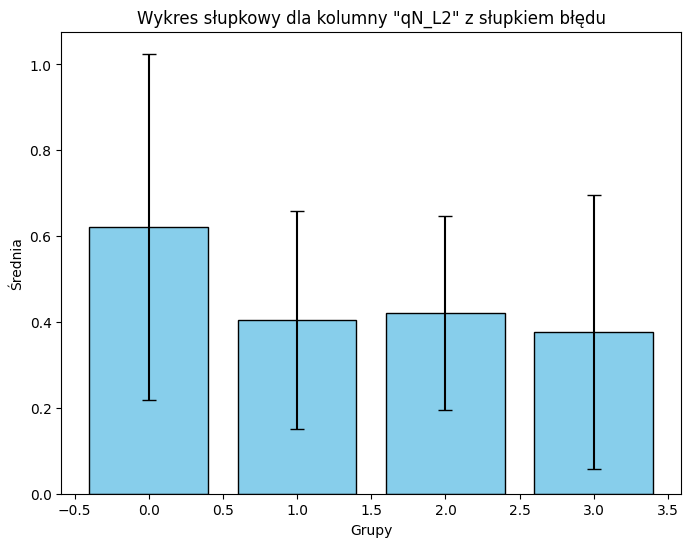

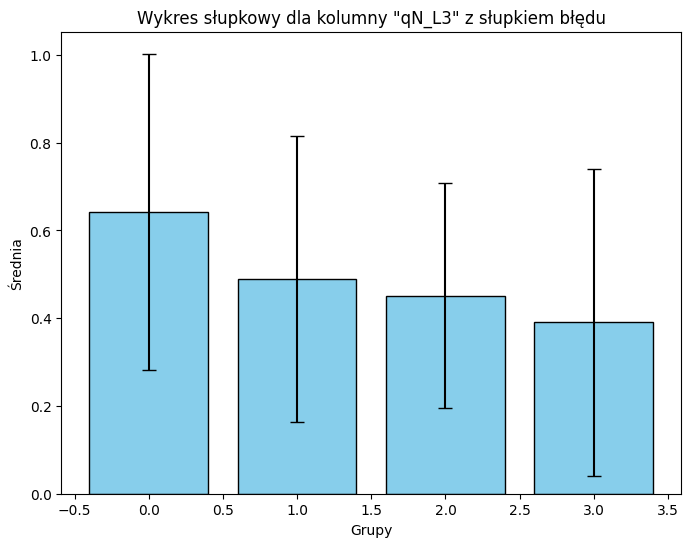

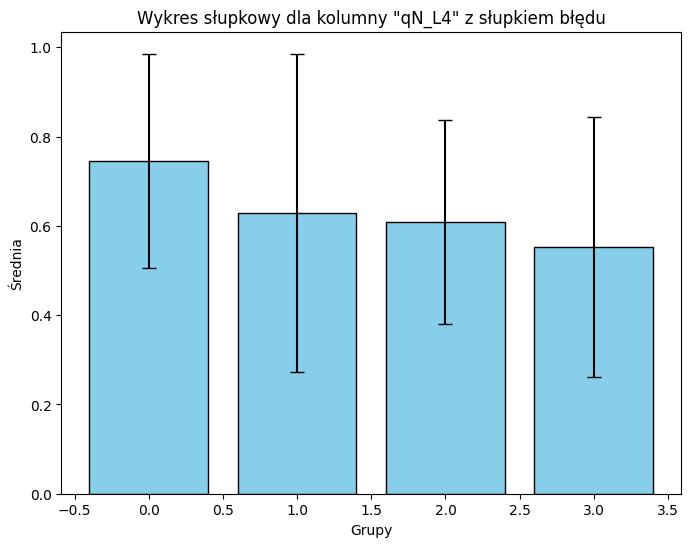

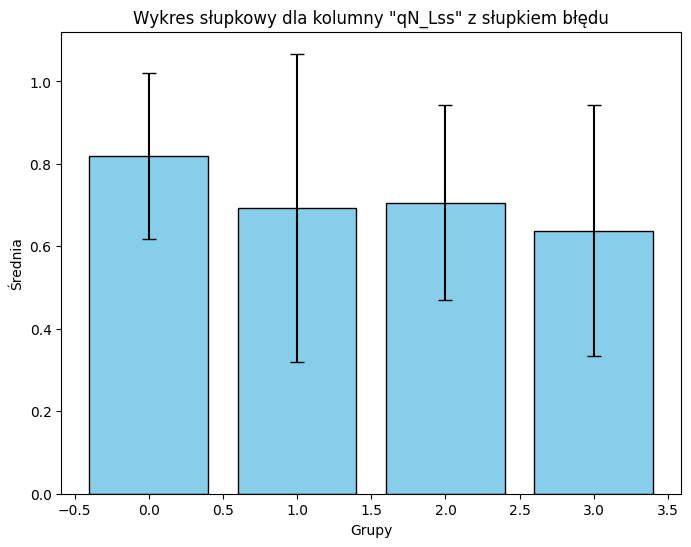

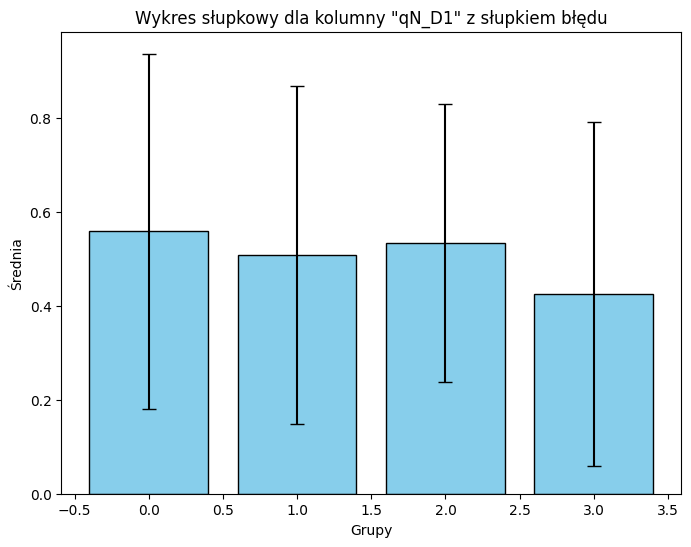

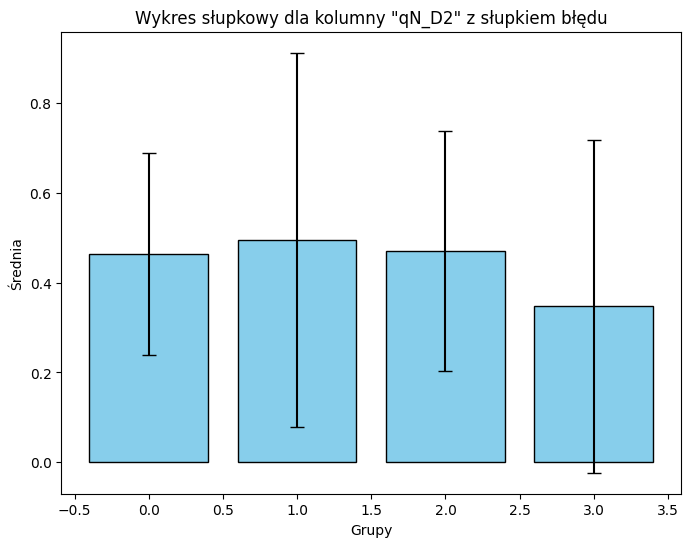

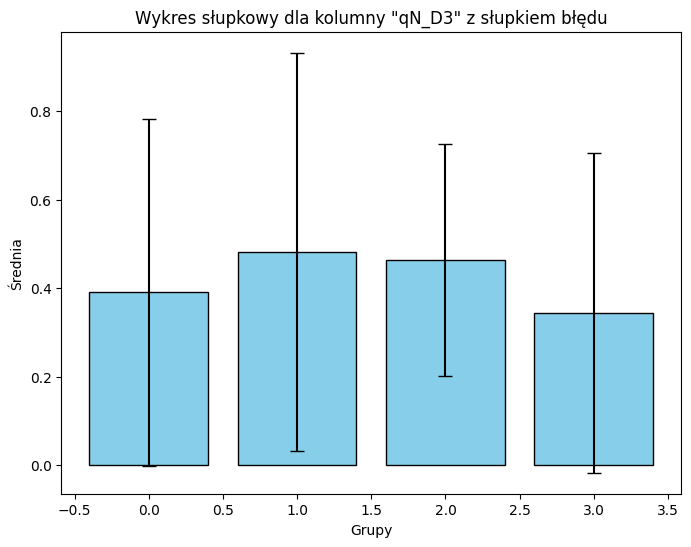

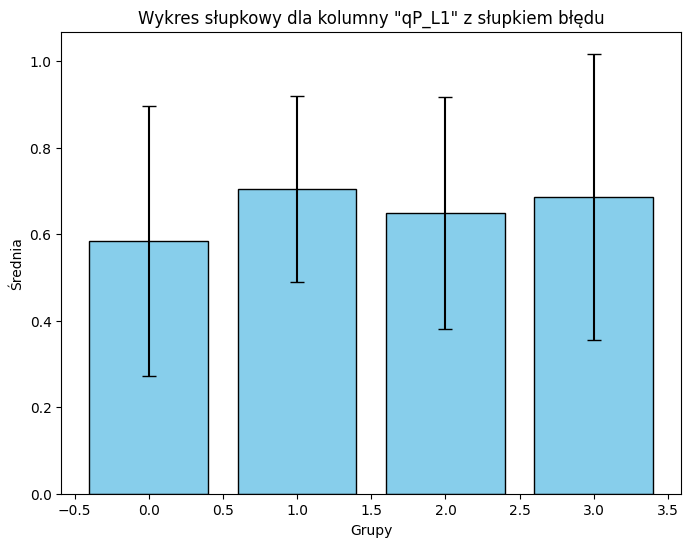

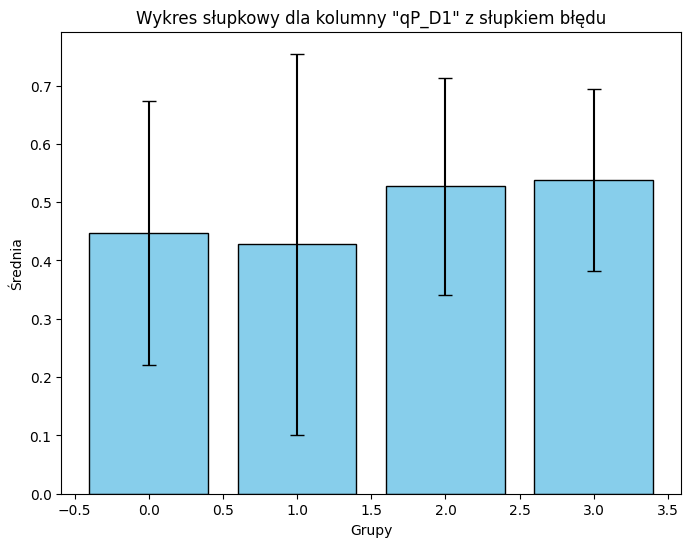

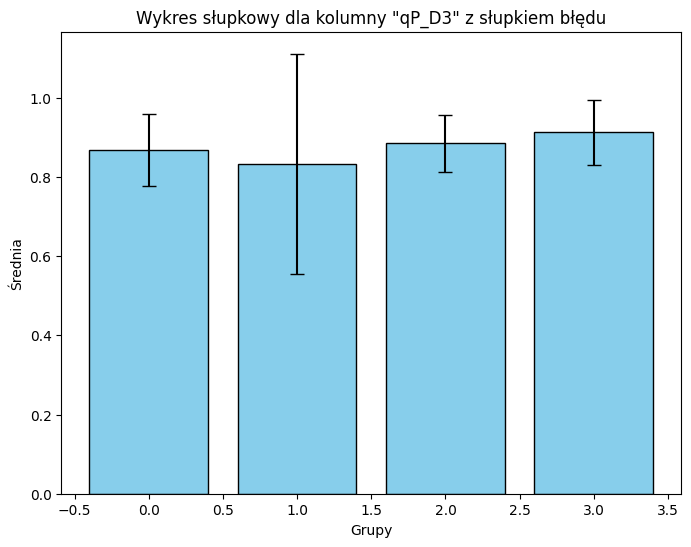

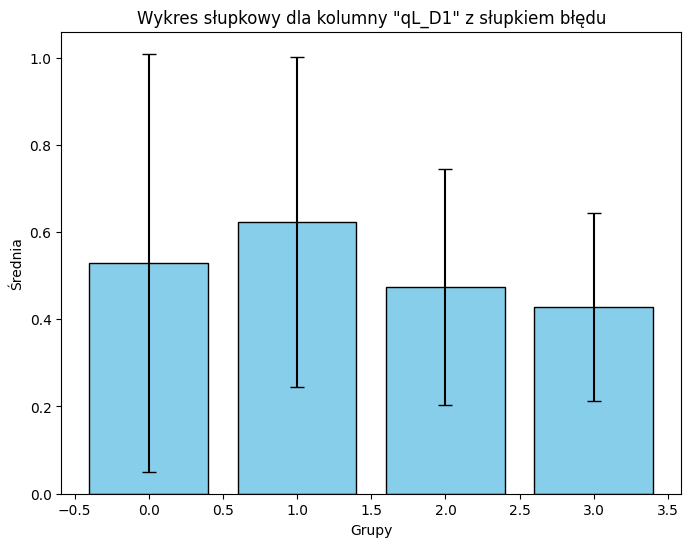

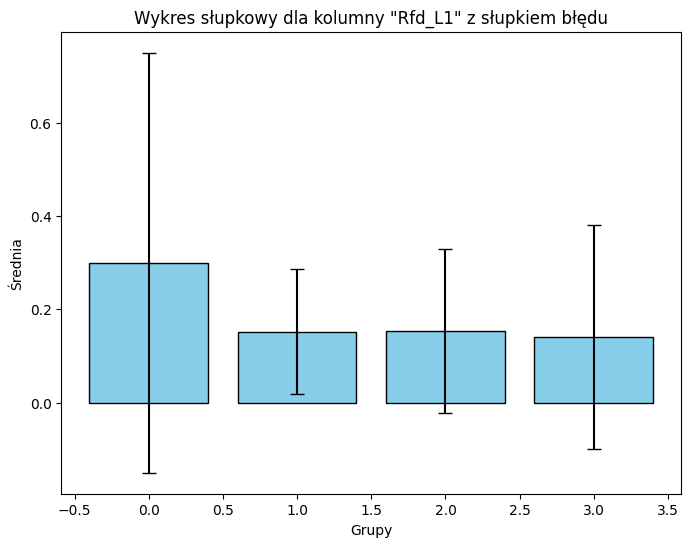

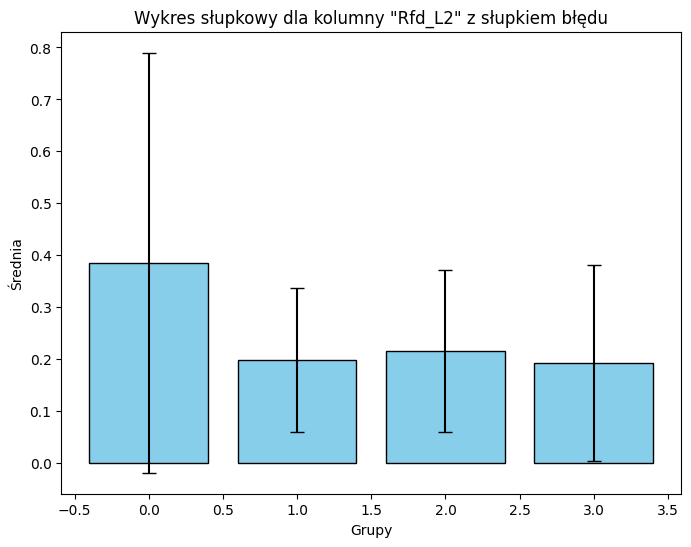

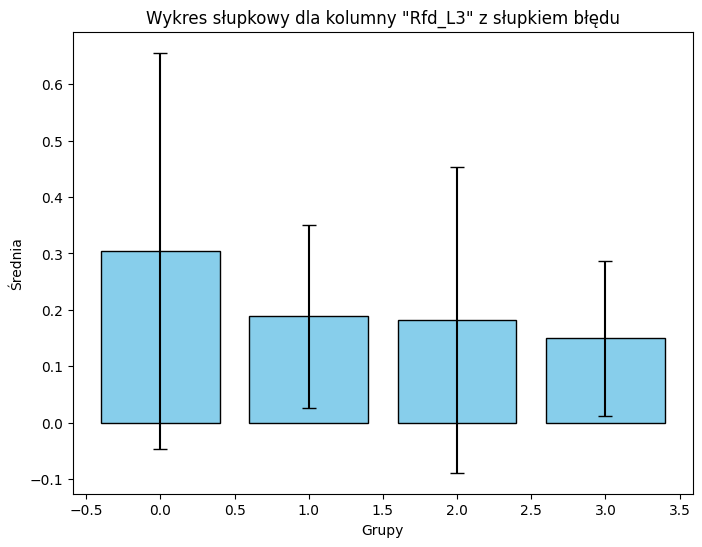

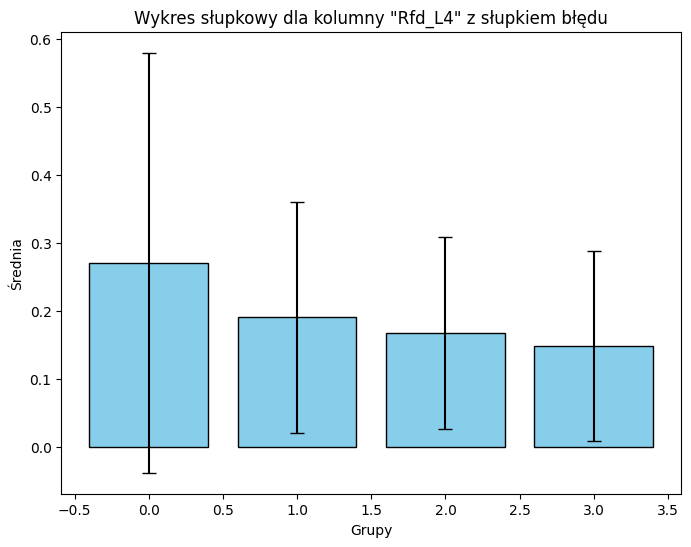

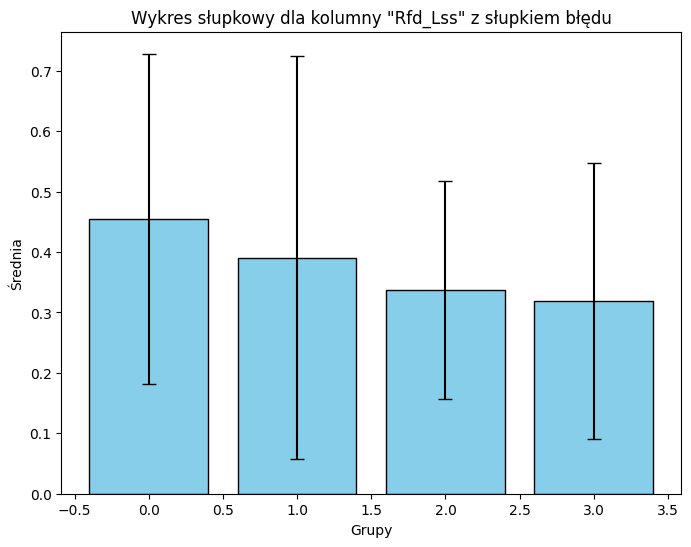

In [ ]:
# Wykres słupkowy dla istotnych kolumn z słupek błędu
for i, column in enumerate(significant_columns):
    plt.figure(figsize=(8, 6))
    group_means = normalized_df.groupby('groups')[column].mean()
    group_std = normalized_df.groupby('groups')[column].std()
    
    # Dodanie słupka błędu (słupek błędu = 1.96 * std)
    plt.bar(group_means.index, group_means, yerr=1.96 * group_std, capsize=5, color='skyblue', edgecolor='black')
    
    plt.title(f'Wykres słupkowy dla kolumny "{column}" z słupkiem błędu')
    plt.xlabel('Grupy')
    plt.ylabel('Średnia')
    plt.show()